In [1]:
#set seeds for reproducibility
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

Import all the dependencies

In [2]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

**Data Curation**

Upload the kaggle.json file

In [3]:
!pip install kaggle

In [4]:
kaggle_credentials = json.load(open("kaggle.json")) #creates an dictionary and stores username and api key

In [5]:
# setup Kaggle API key as environment variables
os.environ['KAGGLE_USERNAME'] = kaggle_credentials["username"]
os.environ['KAGGLE_KEY'] = kaggle_credentials["key"]

In [6]:
#download dataset from kaggle

!kaggle datasets download abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
 95% 1.94G/2.04G [00:47<00:04, 24.4MB/s]
100% 2.04G/2.04G [00:47<00:00, 45.8MB/s]


In [7]:
!ls

kaggle.json  plantvillage-dataset.zip  sample_data


In [8]:
# Unzip the downloaded dataset
with ZipFile("plantvillage-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall()

In [9]:
print(os.listdir('plantvillage dataset'))


print(len(os.listdir("plantvillage dataset/segmented")))
print(os.listdir("plantvillage dataset/segmented")[:5])

print(len(os.listdir("plantvillage dataset/color")))
print(os.listdir("plantvillage dataset/color")[:5])

print(len(os.listdir("plantvillage dataset/grayscale")))
print(os.listdir("plantvillage dataset/grayscale")[:5])

['segmented', 'grayscale', 'color']
38
['Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Soybean___healthy', 'Peach___healthy', 'Tomato___healthy', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus']
38
['Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Soybean___healthy', 'Peach___healthy', 'Tomato___healthy', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus']
38
['Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Soybean___healthy', 'Peach___healthy', 'Tomato___healthy', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus']


Total number of classes = **38**

In [10]:
print(len(os.listdir("plantvillage dataset/segmented/Tomato___healthy")))
print(os.listdir("plantvillage dataset/segmented/Tomato___healthy")[:5])

1591
['1d1221b5-1a59-43bb-a616-8f7a404785b6___RS_HL 0451_final_masked.jpg', 'c11a3cf1-de74-421e-89d0-11ea1508673d___RS_HL 0185_final_masked.jpg', '62e5933a-1405-4f56-b5c6-3bb6996465f5___RS_HL 0378_final_masked.jpg', '8e152ac8-9de2-4f59-a527-bf86d400f184___GH_HL Leaf 482_final_masked.jpg', '48e28bd8-2395-4541-a64c-fd6fab030f06___GH_HL Leaf 352.1_final_masked.jpg']


**Data Preprocessing**

In [11]:
base_dir = 'plantvillage dataset/color'

(256, 256, 3)


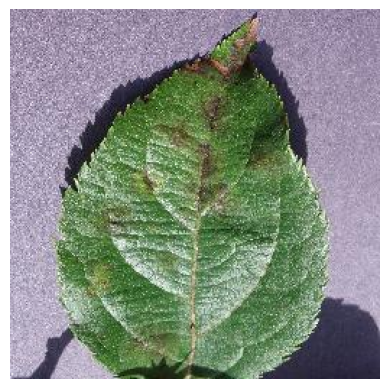

In [12]:
image_path = 'plantvillage dataset/color/Apple___Apple_scab/0340dc35-5215-48ab-8db7-06af99fcb358___FREC_Scab 2966.JPG'

img = mpimg.imread(image_path)

#chack the shape of the image
print(img.shape)

#show the image
plt.imshow(img)
plt.axis('off') #turn of the axis numbers
plt.show()

In [13]:
#pixels of the image
image_path = 'plantvillage dataset/color/Apple___Apple_scab/0340dc35-5215-48ab-8db7-06af99fcb358___FREC_Scab 2966.JPG'

img = mpimg.imread(image_path)
print(img)

[[[146 132 158]
  [140 126 152]
  [203 189 215]
  ...
  [164 149 178]
  [145 130 159]
  [135 120 149]]

 [[143 129 155]
  [147 133 159]
  [149 135 161]
  ...
  [138 123 152]
  [179 164 193]
  [133 118 147]]

 [[149 135 161]
  [175 161 187]
  [156 142 168]
  ...
  [163 148 177]
  [151 136 165]
  [144 129 158]]

 ...

 [[157 152 175]
  [205 200 223]
  [178 173 196]
  ...
  [ 46  43  64]
  [ 47  44  65]
  [ 49  46  67]]

 [[223 217 243]
  [155 149 175]
  [152 146 172]
  ...
  [ 44  41  62]
  [ 44  41  62]
  [ 43  40  61]]

 [[197 191 217]
  [133 127 153]
  [116 110 136]
  ...
  [ 40  37  58]
  [ 38  35  56]
  [ 36  33  54]]]


In [14]:
#Image parameters
img_size = 224
batch_size = 32

**Train-Test Split**

In [15]:
#Image data generator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2, # Use 20% for validation
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [16]:
# Image data generator (FOR VALIDATION - ONLY RESCALING)
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2 # Must match the split in train_datagen
)

In [17]:
#Train generator
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size = (img_size, img_size),
    batch_size = batch_size,
    subset = 'training',
    class_mode = 'categorical' #One-Hot Encoding
)

Found 43456 images belonging to 38 classes.


1. Scans all images under base_dir.<br>
2. Assigns class labels from subfolder names.<br>
3. Uses the training split (e.g., 80%) if validation_split was set in ImageDataGenerator.<br>
4. Resizes each image to (224, 224).<br>
5. Rescales pixel values (e.g., /255 to normalize 0–1).<br>
6. Packages them into batches of 32.<br>
7. Converts labels into one-hot encoded vectors for multi-class classification.<br>
8. Prints “Found ____ images belonging to 38 classes” → confirming dataset count and classes.<br>

In [18]:
#after applying train_generator Get one batch from the generator, to check how it looks
images, labels = next(train_generator)

print("Images shape:", images.shape)
print("Labels shape:", labels.shape)
print("First 5 label vectors:\n", labels[:5])


Images shape: (32, 224, 224, 3)
Labels shape: (32, 38)
First 5 label vectors:
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Images shape: (32, 224, 224, 3) →
*   You have a batch of 32 images.
*   Each image is 224×224 pixels.
*   Each image is 224×224 pixels.
*   3 means 3 color channels (RGB).

Labels shape: (32, 38) →
*   You have 32 label vectors, one for each image.
*   Each vector has 38 positions, one for each class.

Each label looks like [0, 0, 1, 0, ..., 0] → one-hot encoded (the “1” marks the correct class)

In [19]:
# Validation Generator
validation_generator = validation_datagen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

Found 10849 images belonging to 38 classes.


**Convolutional Neural Network**

In [20]:
# Model Definition
# model from scratch
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape = (img_size, img_size, 3)))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(train_generator.num_classes, activation='softmax')) #softmax -> multi-class classifier

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Input Image → Conv2D(32, ReLU) → MaxPooling → Conv2D(64, ReLU) → MaxPooling → Flatten → Dense(256, ReLU) → Dense(38, softmax)

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    47,776,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │         9,766 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,805,158 (182.36 MB)

 Trainable params: 47,805,158 (182.36 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
#compile the model
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [23]:
# new Transfer Learning model

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Input
from tensorflow.keras.models import Model
from tensorflow.keras import layers

# Set input shape from your 'img_size' variable
input_shape = (img_size, img_size, 3)

# Load MobileNetV2 base model
base_model = MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=input_shape
)

# Freeze the base model
base_model.trainable = False

# Create the new model head
inputs = Input(shape=input_shape)
x = base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

# Define the new model
model_mobilenet = Model(inputs=inputs, outputs=predictions)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [24]:
# Print the new model's summary
model_mobilenet.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 38)             │         4,902 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,426,854 (9.26 MB)

 Trainable params: 168,870 (659.65 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [25]:
# Compile the new model
model_mobilenet.compile(optimizer='adam',
                        loss='categorical_crossentropy',
                        metrics=['accuracy']
)

**Model Training**

In [26]:
#train the model built from scratch
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size, #number of steps per epoch
    epochs = 5, #number of epochs
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // batch_size
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 532s 387ms/step - accuracy: 0.3944 - loss: 2.6435 - val_accuracy: 0.7114 - val_loss: 0.9544
Epoch 2/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 521s 383ms/step - accuracy: 0.7055 - loss: 0.9573 - val_accuracy: 0.7506 - val_loss: 0.8108
Epoch 3/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 524s 386ms/step - accuracy: 0.7645 - loss: 0.7530 - val_accuracy: 0.8285 - val_loss: 0.5656
Epoch 4/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 523s 385ms/step - accuracy: 0.8041 - loss: 0.6299 - val_accuracy: 0.7654 - val_loss: 0.7863
Epoch 5/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 524s 386ms/step - accuracy: 0.8255 - loss: 0.5533 - val_accuracy: 0.8469 - val_loss: 0.4925


In [27]:
# train the new MobileNetV2 model
# Using a new history variable name 'history_mobilenet'

# add Callbacks
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_mobilenet_model.keras', save_best_only=True, monitor='val_accuracy', mode='max') #saves the best model


# Train the new model
history_mobilenet = model_mobilenet.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=20, # Can use more epochs, EarlyStopping will handle it
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    callbacks=[early_stopping, model_checkpoint] # Add the callbacks
)

Epoch 1/20
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 531s 379ms/step - accuracy: 0.5886 - loss: 1.5198 - val_accuracy: 0.8907 - val_loss: 0.3572
Epoch 2/20
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 510s 375ms/step - accuracy: 0.8066 - loss: 0.6132 - val_accuracy: 0.9034 - val_loss: 0.3025
Epoch 3/20
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 513s 378ms/step - accuracy: 0.8305 - loss: 0.5289 - val_accuracy: 0.9015 - val_loss: 0.2973
Epoch 4/20
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 511s 376ms/step - accuracy: 0.8445 - loss: 0.4823 - val_accuracy: 0.9040 - val_loss: 0.2921
Epoch 5/20
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 517s 380ms/step - accuracy: 0.8505 - loss: 0.4738 - val_accuracy: 0.9086 - val_loss: 0.2773
Epoch 6/20
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 519s 382ms/step - accuracy: 0.8551 - loss: 0.4497 - val_accuracy: 0.9185 - val_loss: 0.2451
Epoch 7/20
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 518s 381ms/step - accuracy: 0.8585 - loss: 0.4365 - val_accuracy: 0.9206 - val_loss: 0.2363
Epoch 8/20
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 508s 374ms/step - ac

**Model Evaluation**

In [40]:
# Model Evaluation
print("Evaluating model...")
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Evaluating model...
339/339 ━━━━━━━━━━━━━━━━━━━━ 15s 46ms/step - accuracy: 0.8437 - loss: 0.4834
Validation Accuracy: 84.69%


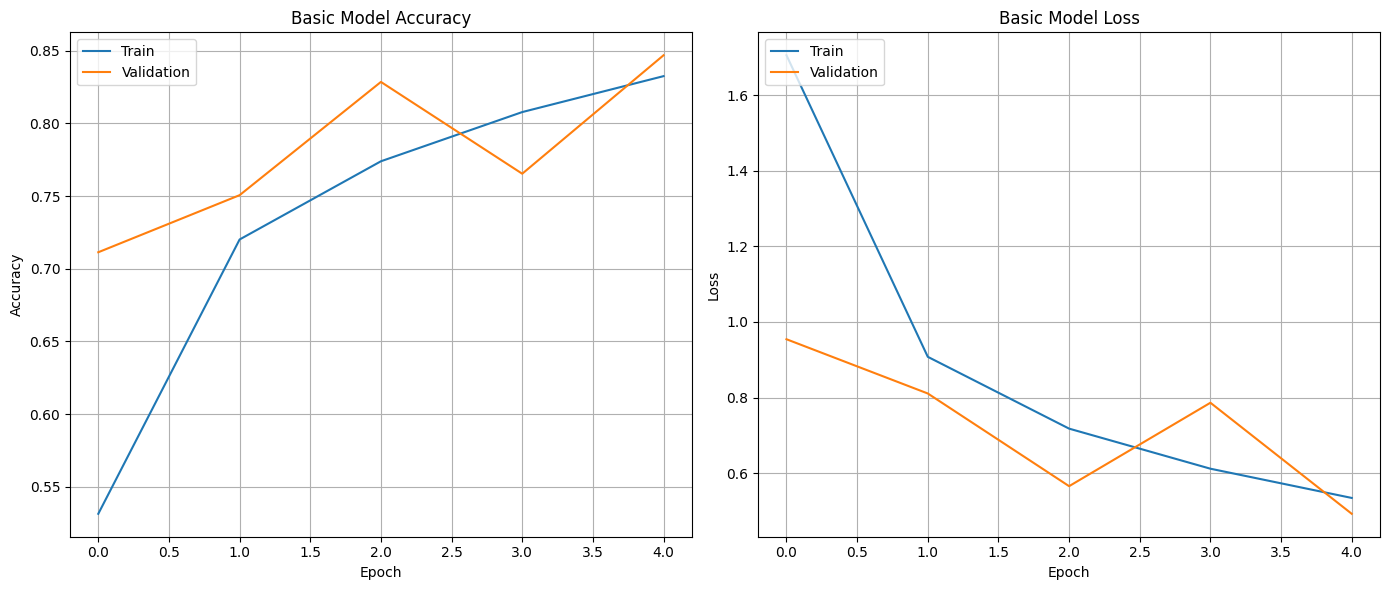

In [46]:
# --- Create One Figure to Hold Both Plots ---
plt.figure(figsize=(14, 6)) # (Width, Height in inches)

# --- First Subplot: Model Accuracy ---
plt.subplot(1, 2, 1) # (1 row, 2 columns, 1st plot)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Basic Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.grid(True)

# --- Second Subplot: Model Loss ---
plt.subplot(1, 2, 2) # (1 row, 2 columns, 2nd plot)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Basic Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.grid(True)

# --- Show the plots ---
plt.tight_layout() # Adjusts plots to prevent them from overlapping
plt.show()

In [41]:
# new model evaluation
print("Evaluating model...")
val_loss_mobilenet, val_accuracy_mobilenet = model_mobilenet.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation Accuracy: {val_accuracy_mobilenet * 100:.2f}%")

Evaluating model...
339/339 ━━━━━━━━━━━━━━━━━━━━ 16s 46ms/step - accuracy: 0.9228 - loss: 0.2248
Validation Accuracy: 92.50%


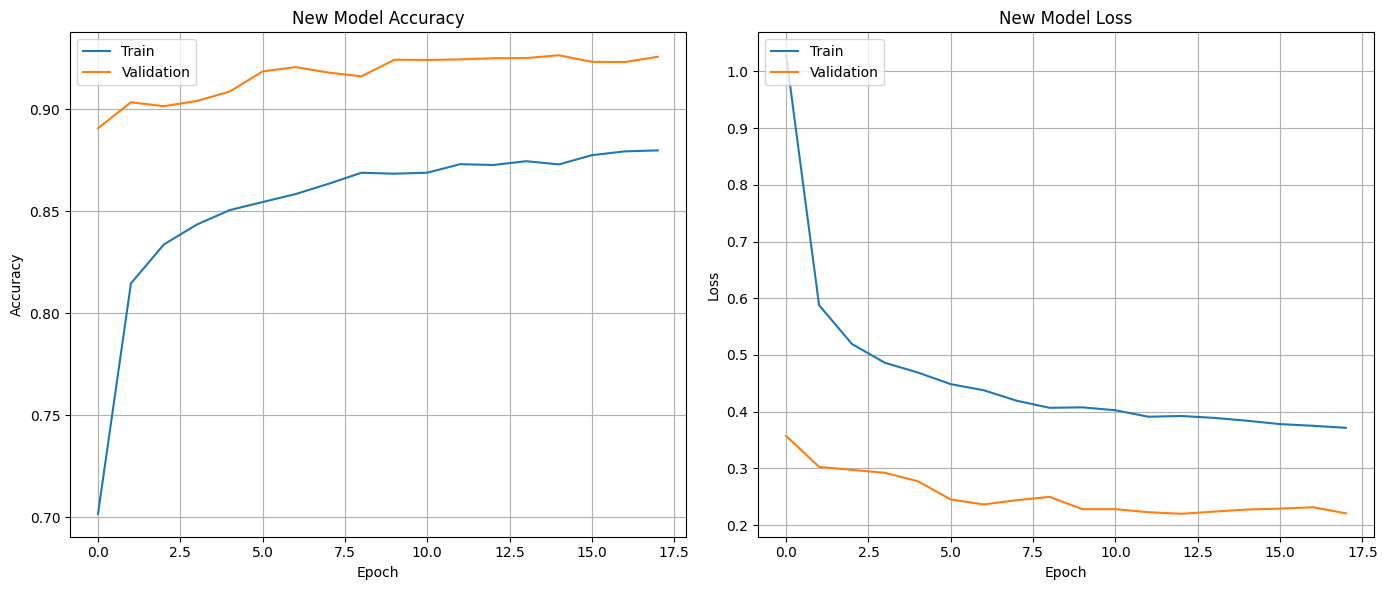

In [48]:
# --- Create One Figure to Hold Both Plots ---
plt.figure(figsize=(14, 6)) # (Width, Height in inches)

# --- First Subplot: Model Accuracy ---
plt.subplot(1, 2, 1) # (1 row, 2 columns, 1st plot)
plt.plot(history_mobilenet.history['accuracy'], label='Train')
plt.plot(history_mobilenet.history['val_accuracy'], label='Validation')
plt.title('New Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.grid(True)

# --- Second Subplot: Model Loss ---
plt.subplot(1, 2, 2) # (1 row, 2 columns, 2nd plot)
plt.plot(history_mobilenet.history['loss'], label='Train')
plt.plot(history_mobilenet.history['val_loss'], label='Validation')
plt.title('New Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.grid(True)

# --- Show the plots ---
plt.tight_layout() # Adjusts plots to prevent them from overlapping
plt.show()

In [44]:
# Confusion Matrix

from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def print_evaluation_metrics(model_to_evaluate, generator, model_name):
    """
    Prints a classification report and displays a confusion matrix
    for a given model and data generator.
    """

    print(f"--- Evaluation Report for: {model_name} ---")

    # --- 1. Get Predictions ---

    # Reset the generator to ensure it starts from the first batch
    generator.reset()

    # Predict from the generator
    # We use generator.samples // generator.batch_size + 1 to ensure all samples are predicted
    predictions = model_to_evaluate.predict(
        generator,
        steps=generator.samples // generator.batch_size + 1
    )

    # Get the class with the highest probability
    predicted_classes = np.argmax(predictions, axis=1)


    # --- 2. Get True Classes ---

    # Get the true class labels from the generator
    true_classes = generator.classes

    # Ensure we only have as many true classes as we made predictions
    # This handles the case where the last batch wasn't full
    true_classes = true_classes[:len(predicted_classes)]

    # Get the class names (labels)
    class_labels = list(generator.class_indices.keys())


    # --- 3. Print Classification Report ---

    print("\nClassification Report:")
    try:
        print(classification_report(true_classes, predicted_classes, target_names=class_labels))
    except ValueError as e:
        print(f"Could not generate classification report: {e}")
        print("This can happen if some classes in the validation set were never predicted.")


    # --- 4. Compute & Plot Confusion Matrix ---

    print("\nConfusion Matrix:")
    cm = confusion_matrix(true_classes, predicted_classes)
    print(cm)

    # Plot the confusion matrix using seaborn
    plt.figure(figsize=(18, 15)) # Increased size for 38 classes
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap='Blues')
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

--- Evaluation Report for: Original Model ---
340/340 ━━━━━━━━━━━━━━━━━━━━ 16s 44ms/step

Classification Report:
                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.01      0.01      0.01       126
                                 Apple___Black_rot       0.00      0.01      0.01       124
                          Apple___Cedar_apple_rust       0.02      0.02      0.02        55
                                   Apple___healthy       0.05      0.06      0.06       329
                               Blueberry___healthy       0.02      0.02      0.02       300
          Cherry_(including_sour)___Powdery_mildew       0.01      0.01      0.01       210
                 Cherry_(including_sour)___healthy       0.01      0.01      0.01       170
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.01      0.01      0.01       102
                       Corn_(maize)___Common_rust_       0

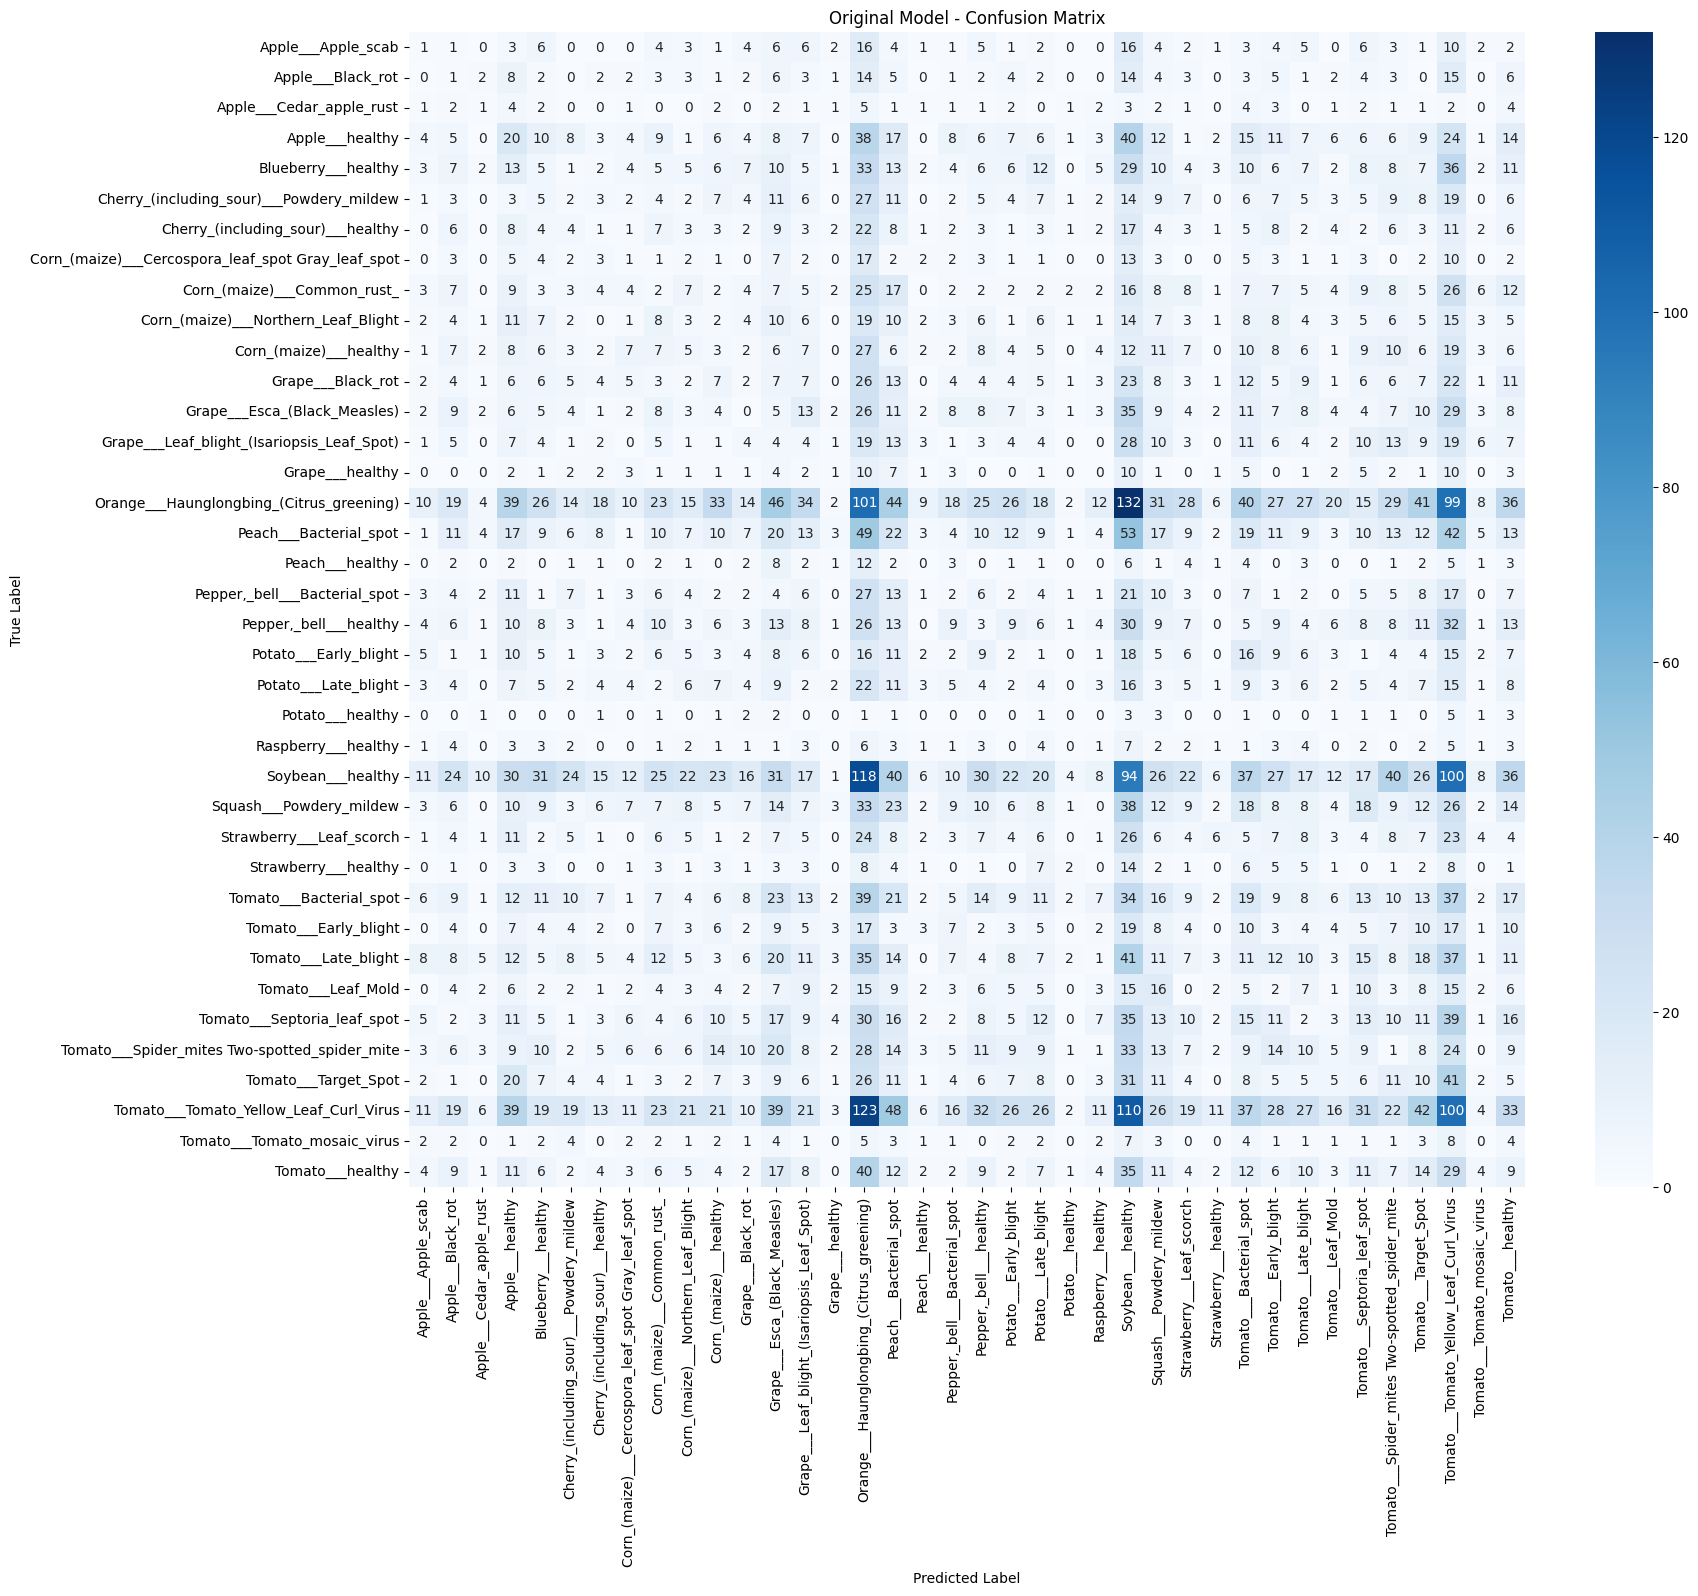

--- Evaluation Report for: MobileNetV2 Model ---
340/340 ━━━━━━━━━━━━━━━━━━━━ 33s 86ms/step

Classification Report:
                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.00      0.00      0.00       126
                                 Apple___Black_rot       0.00      0.00      0.00       124
                          Apple___Cedar_apple_rust       0.00      0.00      0.00        55
                                   Apple___healthy       0.03      0.03      0.03       329
                               Blueberry___healthy       0.03      0.03      0.03       300
          Cherry_(including_sour)___Powdery_mildew       0.03      0.03      0.03       210
                 Cherry_(including_sour)___healthy       0.01      0.01      0.01       170
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.00      0.00      0.00       102
                       Corn_(maize)___Common_rust_     

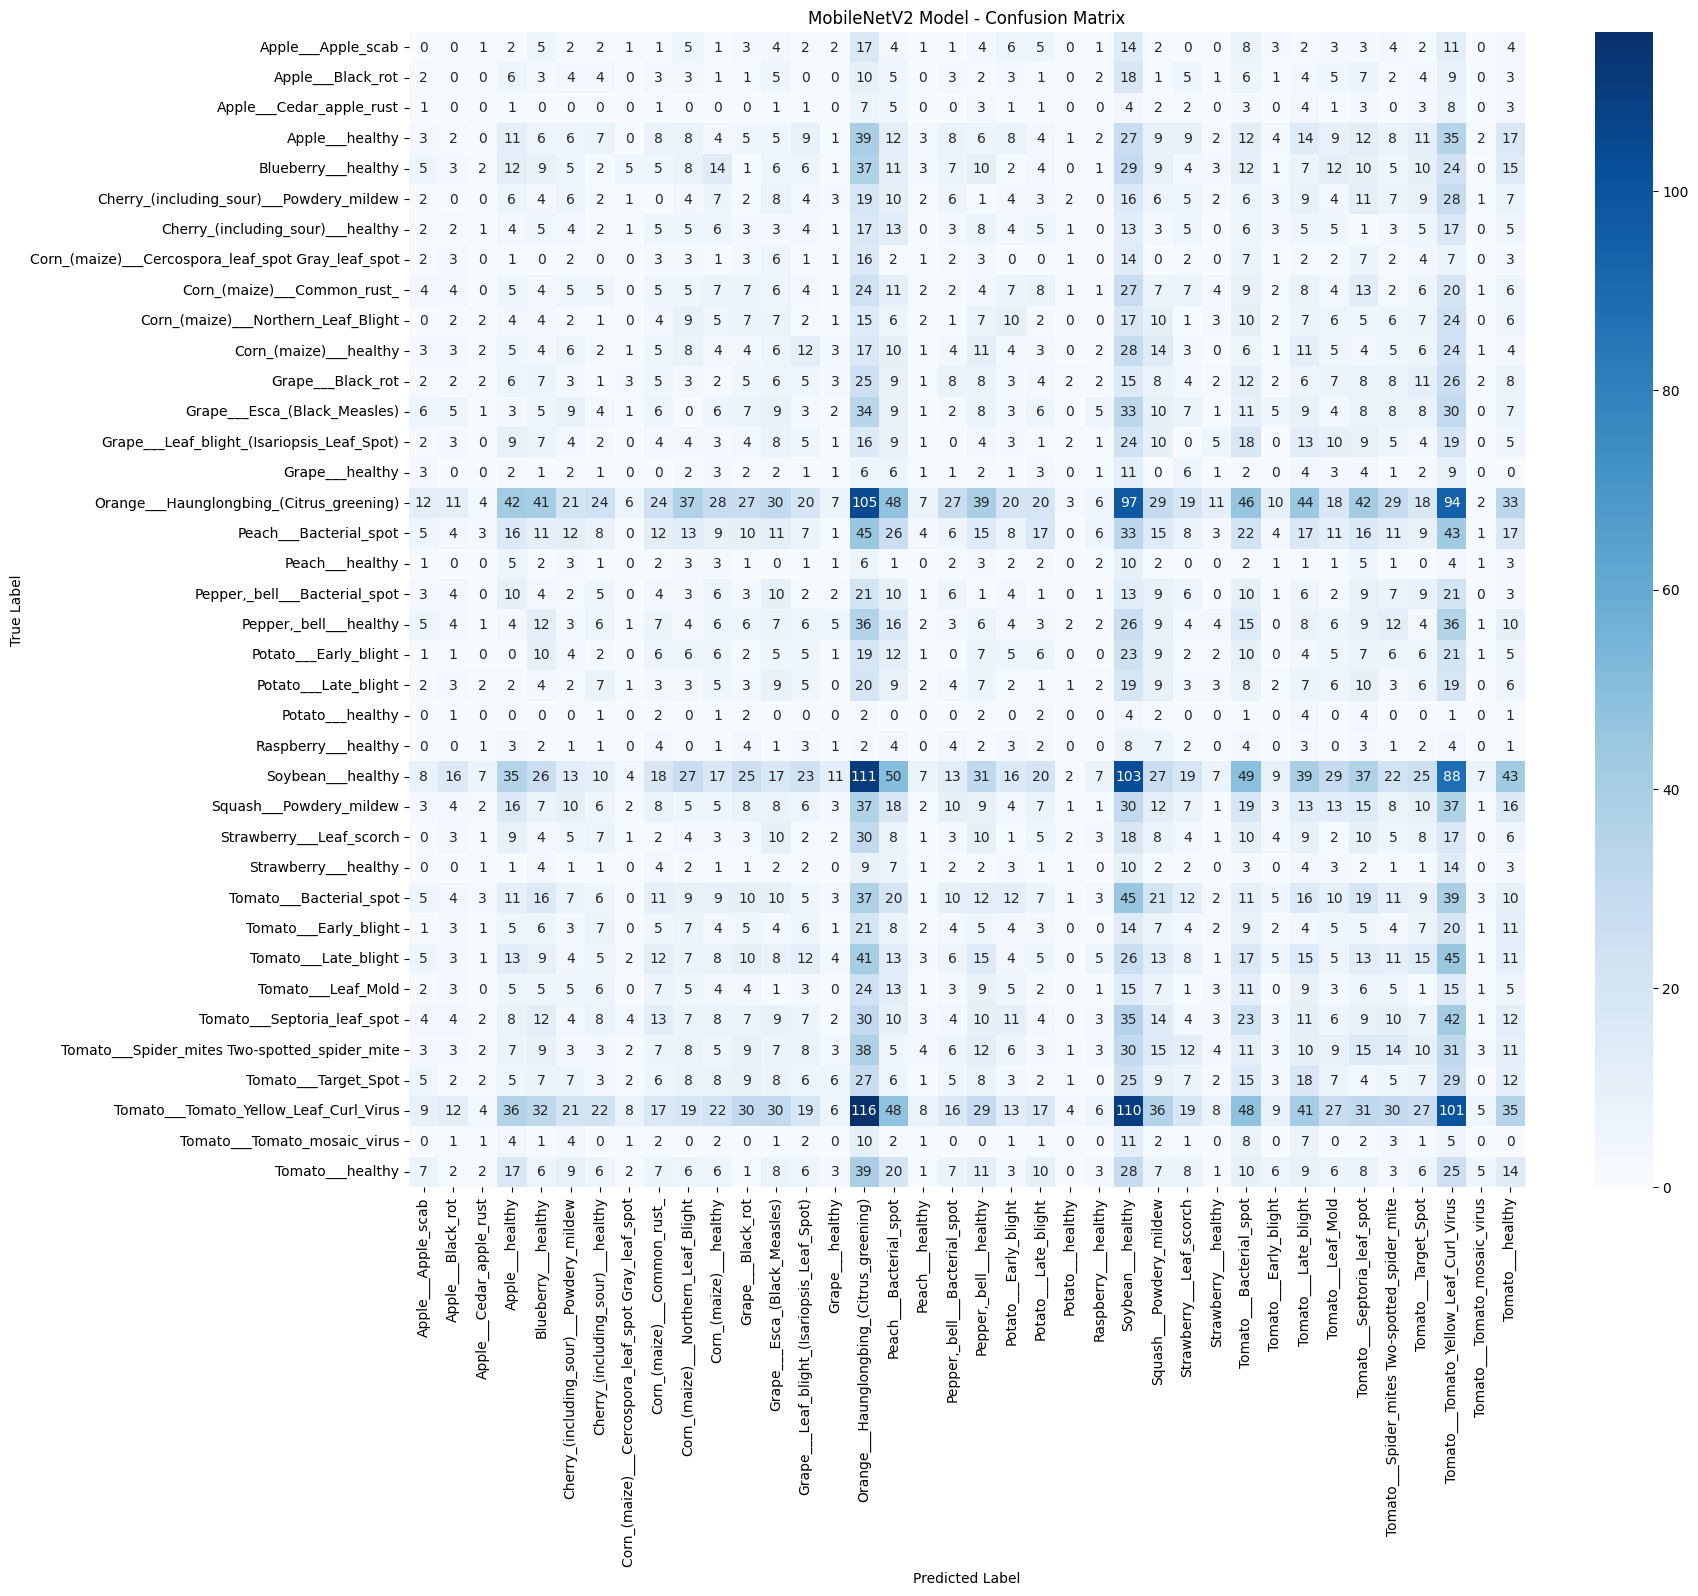

In [33]:
# --- Evaluate your FIRST model ---
# (Make sure you have trained 'model' first)
print_evaluation_metrics(model, validation_generator, "Original Model")


# --- Evaluate your SECOND model ---
# (Make sure you have trained 'model_mobilenet' first)
print_evaluation_metrics(model_mobilenet, validation_generator, "MobileNetV2 Model")

**Building a Predictive System**

In [49]:
# Function to Load and Preprocess the Image using Pillow
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    # Load the image
    img = Image.open(image_path)
    # Resize the image
    img = img.resize(target_size)
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    # Scale the image values to [0, 1]
    img_array = img_array.astype('float32') / 255.
    return img_array

# Function to Predict the Class of an Image
# MODIFIED: The 'class_indices' argument should be the inverted map
def predict_image_class(model, image_path, class_indices_map):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]

    # MODIFIED: Look up the name using the predicted index as the key
    predicted_class_name = class_indices_map[predicted_class_index]
    return predicted_class_name

In [50]:
# 1. Get the original class_indices from the generator (maps name -> index)
class_indices = train_generator.class_indices

# 2. Create the inverted map (maps index -> name)
inv_class_indices = {v: k for k, v in class_indices.items()}

In [51]:
class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

In [52]:
# saving the class names as json file
json.dump(class_indices, open('class_indices.json', 'w'))

In [60]:
# Example Usage

# Make sure you have uploaded this file to your Colab environment!
image_path = 'test_potato_early_blight.jpg'

# Pass the trained MobileNetV2 model and the inverted map to the function
predicted_class_name = predict_image_class(model_mobilenet, image_path, inv_class_indices)

# Output the result
print("Predicted Class Name:", predicted_class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predicted Class Name: Potato___Early_blight
